In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
import plotly.express as px
sns.set()

# Q1: Metropolis-Hastings

For the spatial part of Hydrogen atom, we can guess a wave function $\Psi_{T,\alpha} \propto e^{-\alpha r}$. So, $E_{Local}$ is equal to

$$ E_L = \frac{\hat{H}\,\Psi_{T,\alpha}}{\Psi_{T,\alpha}} = -\frac{1}{2}\left(\alpha^2 - 2\frac{\alpha}{r} \right) - \frac{1}{r}\,. $$

Now we need to calculate the best-fit value for $\alpha$. Note that there are 3 more complications here compared to the question from the last problem set.

1. $r$ here is not Cartesian but is the spatial part of spherical coordinates.

2. $E_L$ at $\alpha = 1$ becomes independent of $r$ (Spoiler: this is infact the correct answer).

3. For $\alpha \ne 1$ there's a singularity at $r = 1$ in which the potential diverges.

## (a)

Like before, write a function to preform a Metropolis-Hastings algorithm to find a distribution for $r$ at a defined $\alpha$ this time using a non-symmetric $Q(x^\prime; x)$ as discussed in the lecture.

P.S. Use two different functions for $Q$ at your choise.

In [82]:
def P(r, a = 0.5):
    return np.exp(-a*r)

In [255]:
def Q(r, r0):
    return np.exp(-r/r0)

In [256]:
def Metropolis(N_iteration, P, Q, a):
    """
    n: number of iterations
    p: probability of acceptance
    q: proposal density
    a: parameter of probability density
    """
    R = []
    x_old = np.random.rand()
    y_old = np.random.rand()
    z_old = np.random.rand()
    r_old = np.sqrt(x_old**2 + y_old**2 + z_old**2)
    
    for i in range(N_iteration):
        x_new = x_old + np.random.uniform(-1,1)
        y_new = y_old + np.random.uniform(-1,1)
        z_new = z_old + np.random.uniform(-1,1)
        r_new = np.sqrt(x_new**2 + y_new**2 + z_new**2)

        w = (P(r_new, a)/P(r_old, a)) *(Q(r_new, r_old)/Q(r_old, r_new))
        alpha = min(1, w)
        u = np.random.rand()
        if  u <= alpha:
            R.append(r_new)
            x_old = x_new
            y_old = y_new
            z_old = z_new
            r_old = r_new
        else:
            R.append(r_old)
    return R

In [257]:
n = 100000
bins = 100
R = Metropolis(n, P, Q , 0.4)

In [258]:
r = np.linspace(0, 10, 100)

In [259]:
from scipy import integrate
norm = integrate.quad(P, 0 ,np.inf)[0]

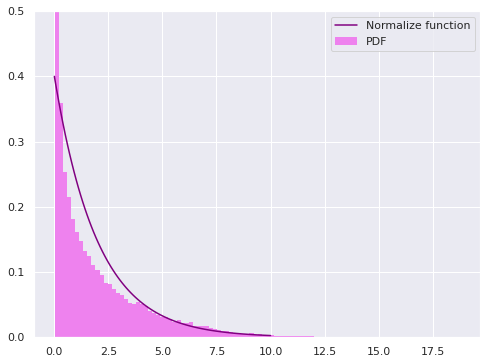

In [263]:
plt.figure(figsize= (8, 6))
plt.hist(R, bins = bins,  density = True, label = "PDF", color="violet", linewidth=0)
plt.plot(r, P(r,0.5)/norm, label= "Normalize function", color = 'purple')
plt.ylim(0, 0.5)
plt.legend()
plt.show()

## (b)

Plot histograms for $r$ with different sizes for each choise of $Q$ and compare them to each other and the analytical function. Which choise of $Q$ is better? Do you think there's a mathematical reason behind this?

In [3]:
# Your code here

## (c)

As before, plot $\langle E_L \rangle$ and $\sigma^2 = \langle E_L^2 \rangle - \langle E_L \rangle^2$ for different values of $\alpha$ and show that indeed $\alpha = 1$ is the best-fit value.

In [145]:
def El(r, a):
  return -0.5*(a**2-2*(a/r)) - (1/r)

def sigma2(r, a, El):
  return np.mean(El(r, a)**2)- np.mean(El(r, a))**2

# Q2: FFT (warm up)

## (a)
Using `'scipy.fft'`, calculate and the fourier modes of $x(t) = 2\sin(t) + \sin(10t)$. Plot the absolute values.

In [74]:
from scipy.fft import fft, fftshift, fftfreq

In [3]:
n = 1000
ti = 0    #s
tf = 20   #s
t = np.linspace(ti, tf, n)
def X(t):
    return 2*np.sin(t)+np.sin(10*t)

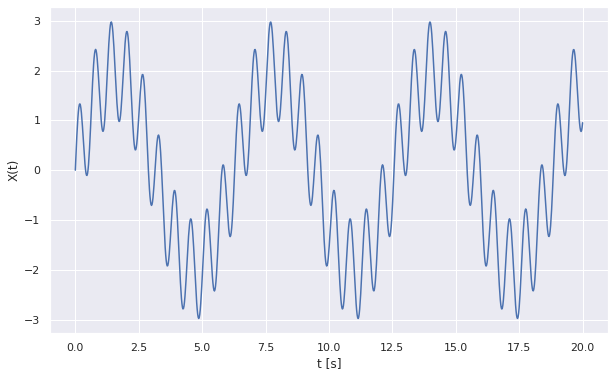

In [4]:
plt.figure(figsize=(10,6))
plt.plot(t,X(t))
plt.xlabel('t [s]')
plt.ylabel('X(t)')
plt.show()

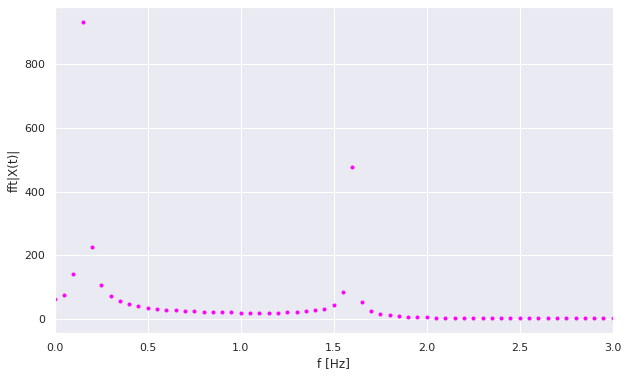

In [38]:
plt.figure(figsize=(10,6))
yf = fft(X(t))
xf = fftfreq(n, d= (tf - ti)/n)
xf = fftshift(xf)
yplot = fftshift(yf)
plt.plot(xf,np.abs(yplot), ".", c = 'magenta')
plt.xlim(0,3)
plt.xlabel('f [Hz]')
plt.ylabel('fft|X(t)|')
plt.show()

What's the prominent frequency? Does it make sense? If not, what's wrong with the code?

The prominent frequencies are 0.15 and 1.6 Hz. Their corresponding omega are 2* pi * 0.15 = 1 and 2 * pi * 1.6 = 10.

<img src= 'https://upload.wikimedia.org/wikipedia/commons/thumb/0/07/Simple_time_domain_vs_frequency_domain.svg/512px-Simple_time_domain_vs_frequency_domain.svg.png?20210422140332' >

## (b)

Calculate and plot Fourier transform of sawtooth function.

In [14]:
from scipy.signal import sawtooth

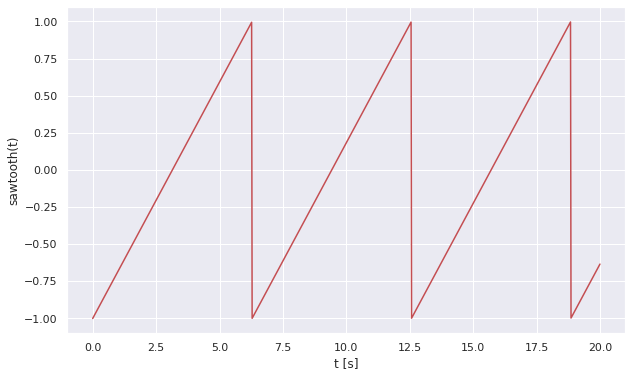

In [15]:
plt.figure(figsize=(10,6))
plt.plot(t, sawtooth(t), c='r')
plt.xlabel('t [s]')
plt.ylabel('sawtooth(t)')
plt.show()

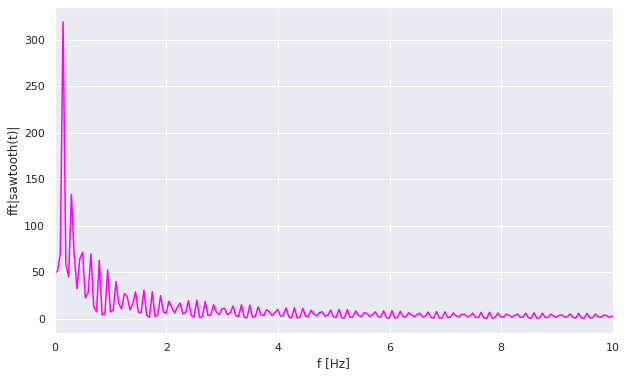

In [16]:
yf = fft(sawtooth(t))
xf = fftfreq(n, d=t[1]-t[0])
xf = fftshift(xf)
yplot = fftshift(yf)
plt.figure(figsize=(10,6))
plt.plot(xf, np.abs(yplot),  c = 'magenta')
plt.xlim(0,10)
plt.xlabel('f [Hz]')
plt.ylabel('fft|sawtooth(t)|')
plt.show()

# Q3: Sunspot data

The attached file `Sunspots.csv` contains monthly solar activity data over a 272 year period. First read the data in a pandas Dataframe and tell pandas to interpret the second column as `datetime`.

In [69]:
import pandas as pd

In [70]:
spot = pd.read_csv('Sunspots.csv', index_col=0)
spot

,Date,Monthly
Num,,
0,1749-01-31,96.7
1,1749-02-28,104.3
2,1749-03-31,116.7
3,1749-04-30,92.8
4,1749-05-31,141.7
...,...,...
3260,2020-09-30,0.6
3261,2020-10-31,14.4
3262,2020-11-30,34.0


In [71]:
spot.Date = pd.to_datetime(spot.Date)

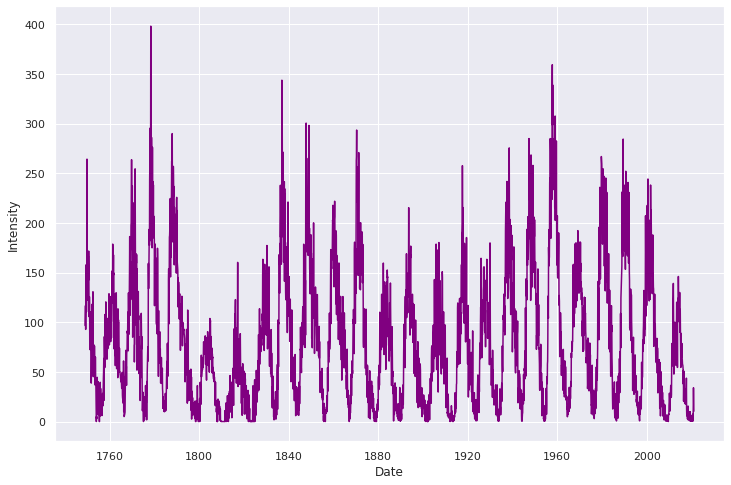

In [72]:
plt.figure(figsize=(12,8))
plt.plot(spot.Date, spot['Monthly'], color = "purple")
plt.xlabel('Date')
plt.ylabel('Intensity')
plt.show()

## (a)

Do an appropriate Fourier analysis to determine the main cylce of solar activity. What's the period?

In [75]:
y = spot.Monthly.to_numpy()
yf = fft(y)
xf = fftfreq(y.size)
xf = fftshift(xf)
yplot = fftshift(yf)
fig = px.line(x = xf,y = np.abs(yplot))
fig.update_xaxes(range=[0,0.02])


In [328]:
# The main period is: 1/0.0076 = 131.57 months = 10.96 yr

## (b)
First do an inverse Fourier analysis to confirm that you get back the same data.

In [178]:
from scipy.fft import ifft, ifftshift

In [81]:
Y = ifft(yf) # Inverse Fourier Transform

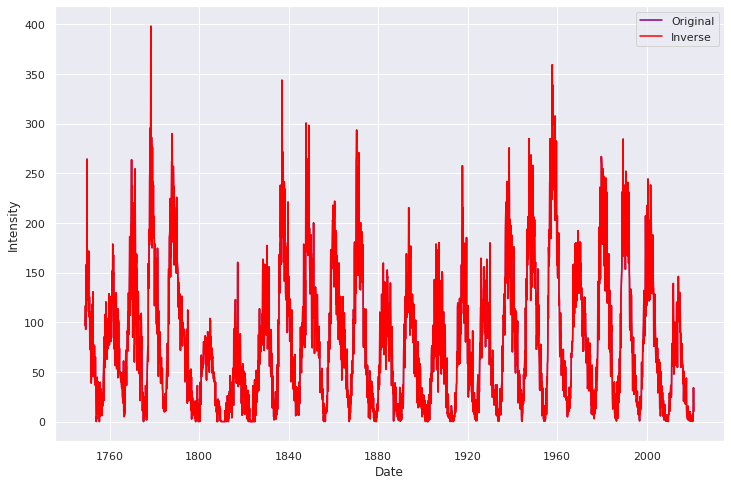

In [89]:
plt.figure(figsize=(12,8))
plt.plot(spot.Date, y, color = "purple", label = "Original")
plt.plot(spot.Date, abs(Y), color = "red", label = "Inverse")
plt.xlabel('Date')
plt.ylabel('Intensity')
plt.legend()
plt.show()

## (c)

Remover the first ten biggest values of Fourier transformed series, do an inverse transform once more and plot the results.

Why does the plot look different? And what's the difference?

In [153]:
Yf = abs(yf)  # amplitude
Yf.sort()  # sort the amplitude
Yf[-10:] = 0 # remove the last 10 highest amplitudes
Y = ifft(Yf) # Inverse Fourier Transform of the new amplitude

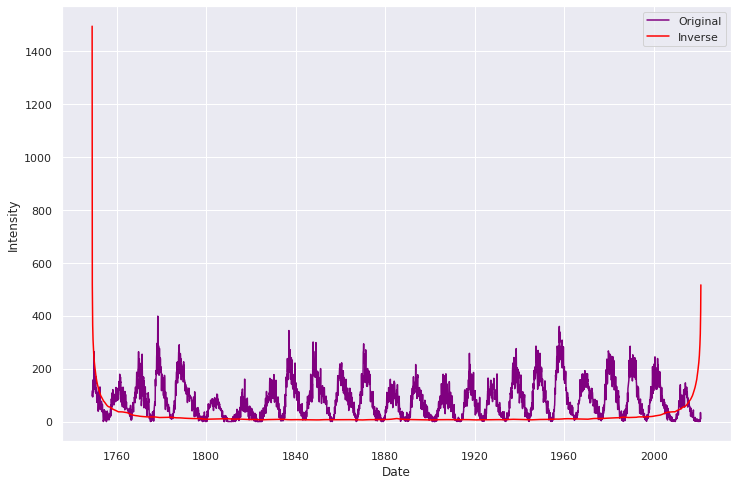

In [157]:
plt.figure(figsize=(12,8))
plt.plot(spot.Date, y, color = "purple", label = "Original")
plt.plot(spot.Date, abs(Y), color = "red", label = "Inverse")
plt.xlabel('Date')
plt.ylabel('Intensity')
plt.legend()
plt.show()

In [158]:
# we remove the 10 highest amplitudes so when we inverse the Fourier Transform, we get a signal with zero amplitude.

# Q4: Correlation function and power spectrum

Remember from last homework that we calculated autocorrelation function for a data that we made?

Load the data saved as `2pcf.txt`, calculate the correlation function once more and then plot the power spectrum using that data.

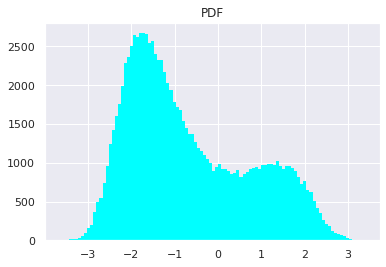

In [160]:
data = pd.read_csv("2pcf.txt", header= None)
plt.hist(data[0], bins = 100, color="cyan", label = "PDF", linewidth = 0)
plt.title('PDF')
plt.show()

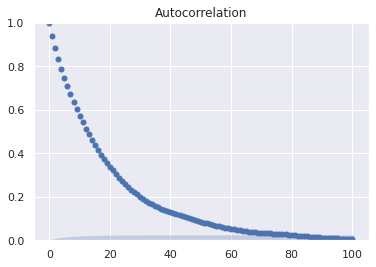

In [193]:
from statsmodels.graphics import tsaplots
tsaplots.plot_acf(data[0].to_numpy(), lags=100, use_vlines= False)
plt.ylim(0,1)
plt.show()

In [179]:
def autocorrelation(x):
    xp = ifftshift((x - np.average(x))/np.std(x)) 
    n, = xp.shape
    xp = np.r_[xp[:n//2], np.zeros_like(xp), xp[n//2:]]
    f = fft(xp)
    p = np.absolute(f)**2
    pi = ifft(p)
    return np.real(pi)[:n//2]/(np.arange(n//2)[::-1]+n//2)

In [186]:
Y = autocorrelation(data[0].to_numpy())

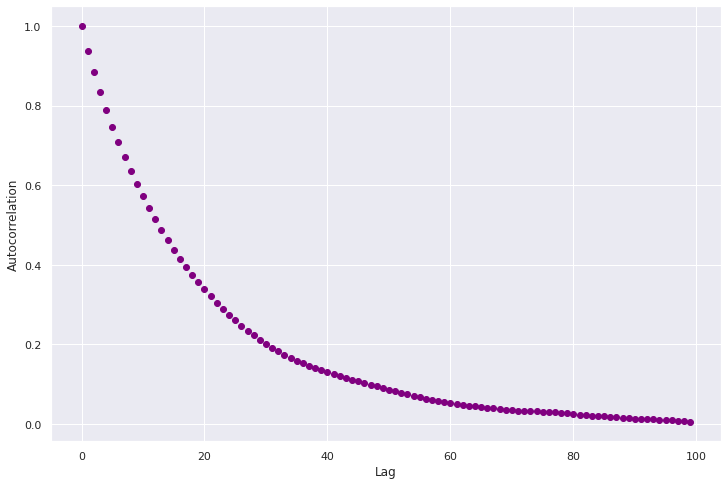

In [191]:
plt.figure(figsize=(12,8))
plt.plot(range(100), Y[:100], 'o', color = "purple", label = "Autocorrelation",)
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.show()

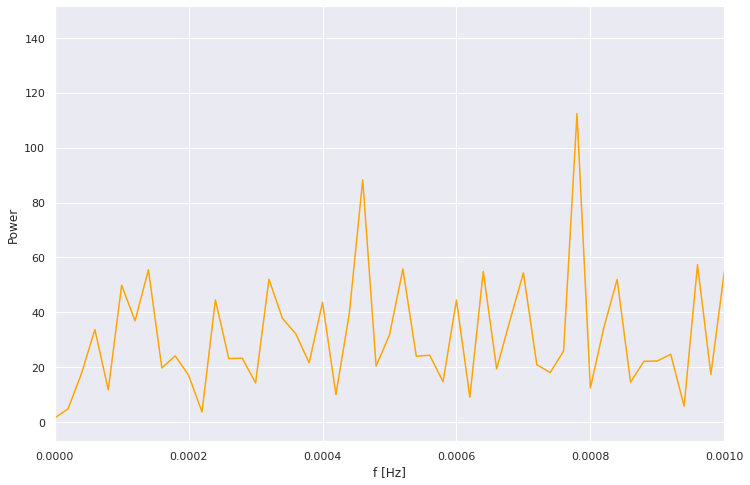

In [230]:
P = fft(Y) #Correlation function and power spectrum are Fourier 2 transforms of each other
xp = fftfreq(Y.size)
xp = fftshift(xp)
pplot = fftshift(P)
plt.figure(figsize=(12,8))
plt.plot(xp, abs(pplot), c= 'orange')
plt.xlabel('f [Hz]')
plt.xlim(0,0.001)
plt.ylabel('Power')
plt.show()


# Q5: Real world example (Bonous question)

The two point correlation function is like autocorrelation but for multi-dimensional data. Here instead of "lags" we use distances.

The file `cmb_camb_N1024_PS12.npy` is part of the CMB temperature map, you can read it directly using `np.load` function.

Calculate the two point correlation for the CMB map, plot it, and then calculate the power spectrum and plot it too.

P.S. the provided data is 1024$\times$1024, it needs too much computational power to calculate correlation for every point. You may use only a fraction of data points, if they are chosen randomly, the result would be the same. Also for the distances, you do not need to cover the whole length of the image.

In [278]:
cmb = np.load("cmb_camb_N1024_PS12.npy")

In [279]:
cmb

array([[-58.86565019, -52.00479425, -45.52710632, ..., -81.6929155 ,
        -73.78002855, -66.13692367],
       [-55.94739134, -49.27693447, -43.07373188, ..., -78.91851077,
        -70.82681261, -63.13741826],
       [-54.47494619, -48.02817536, -42.09378046, ..., -77.28168017,
        -69.1433192 , -61.51249752],
       ...,
       [-75.58483339, -68.70942337, -61.74952149, ..., -95.43718643,
        -89.00184571, -82.36334943],
       [-68.92469854, -61.93094363, -55.0374856 , ..., -90.22468918,
        -83.139877  , -76.01144799],
       [-63.24349284, -56.26327424, -49.5423045 , ..., -85.53139564,
        -77.95155842, -70.48945155]])

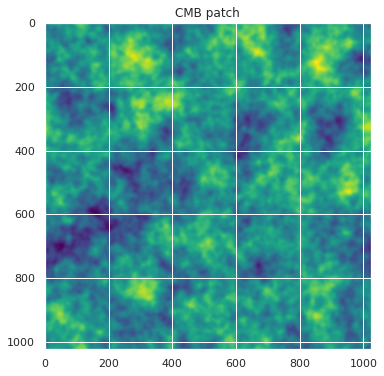

In [281]:
fig = plt.figure(figsize=(6,6))
plt.imshow(cmb, cmap = 'viridis')
plt.title('CMB patch')
plt.show()

In [ ]:
# Your answers here